Customers dataset head:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Transactions dataset head:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Merged dataset h

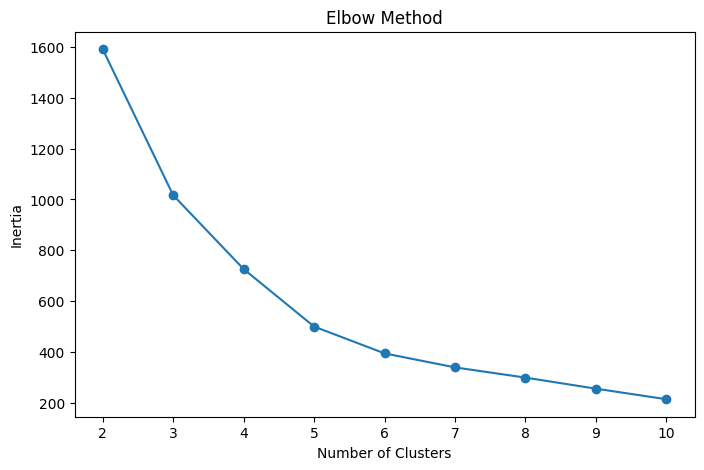

Davies-Bouldin Index: 0.8497454238459561


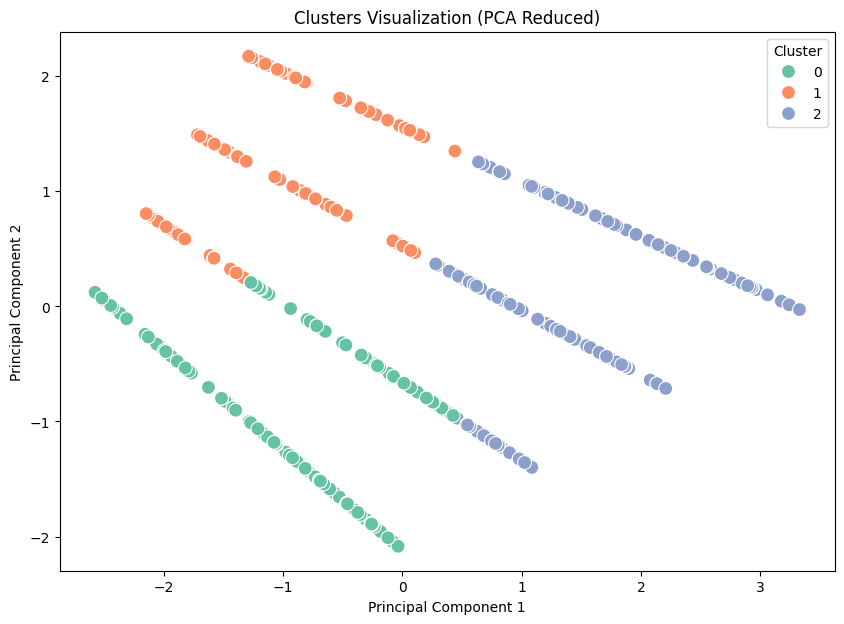

Clustered data saved to 'Clustered_Customers.csv'.
Cluster
2    39.0
0    37.0
1    24.0
Name: proportion, dtype: float64


In [4]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


customers_path = '/content/Customers.csv'
transactions_path = '/content/Transactions.csv'

customers = pd.read_csv(customers_path)
transactions = pd.read_csv(transactions_path)


print("Customers dataset head:")
print(customers.head())

print("\nTransactions dataset head:")
print(transactions.head())


data = pd.merge(customers, transactions, on='CustomerID')


print("\nMerged dataset head:")
print(data.head())


features = data.select_dtypes(include=[np.number])


features = features.fillna(features.mean())


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


def plot_elbow_method(data, max_clusters=10):
    inertia = []
    for n in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

plot_elbow_method(scaled_features)


optimal_clusters = 3 #i changed the optimal clusters to 3 as the elbow bend was visible at 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

data['Cluster'] = labels


db_index = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_index}")


from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title('Clusters Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Save the clustered data for further analysis
data.to_csv('Clustered_Customers.csv', index=False)
print("Clustered data saved to 'Clustered_Customers.csv'.")
cluster_distribution = data['Cluster'].value_counts(normalize=True) * 100
print(cluster_distribution)
